In [3]:
import torch
from model import Model
import matplotlib.pyplot as plt
import torchvision.transforms as T 
from PIL import Image
from torch.profiler import profile, record_function, ProfilerActivity

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Model(device=device)

path_train = '../data/train_data.pkl'
path_val = '../data/val_data.pkl'

noisy_imgs_1, noisy_imgs_2 = torch.load(path_train)
noisy_imgs_1 = noisy_imgs_1
noisy_imgs_2 = noisy_imgs_2

noisy_imgs , clean_imgs = torch.load(path_val)
# noisy_imgs = noisy_imgs.float()/256
# clean_imgs = clean_imgs.float()/256


In [4]:
model.train(noisy_imgs_1, noisy_imgs_2, 100)
out = model.predict(noisy_imgs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:34<00:00,  1.55s/it]


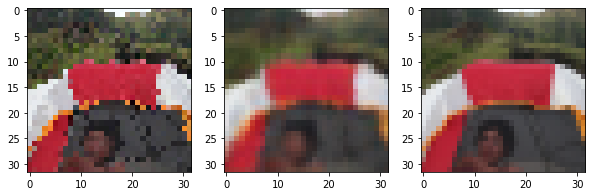

In [5]:
transform = T.ToPILImage()
plt.figure(figsize = [10, 5])
plt.subplot(1, 3,1)
plt.imshow(transform(noisy_imgs[20]));
plt.subplot(1, 3,2)
plt.imshow(transform(out[20]/256));
plt.subplot(1, 3,3)
plt.imshow(transform(clean_imgs[20]));

In [6]:
def psnr(denoised, ground_truth):
    mse = torch.mean((denoised-ground_truth)**2)
    return -10 * torch.log10(mse + 10**(-8))

psnr(out.cpu().float()/256, clean_imgs.float()/256)


tensor(24.0326)

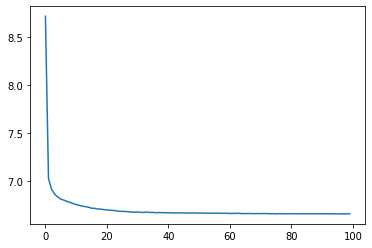

In [11]:

import matplotlib.pyplot as plt
plt.plot(model.loss_train.detach().cpu())


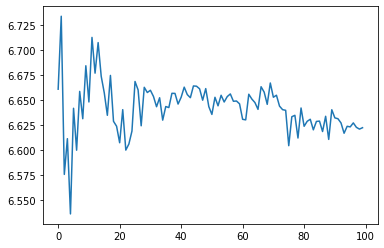

In [12]:
plt.plot(model.loss_valid.detach().cpu())